In [4]:
def getData(balance_ones=True, Ntest=1000):
    # images are 48x48 = 2304 size vectors
    Y = []
    X = []
    first = True
    for line in open(r'/Users/prof/Documents/ferdata.csv'):
        if first:
            first = False
        else:
            row = line.split(',')
            Y.append(int(row[0]))
            X.append([int(p) for p in row[1].split()])

    X, Y = np.array(X) / 255.0, np.array(Y)

    # shuffle and split
    X, Y = shuffle(X, Y)
    Xtrain, Ytrain = X[:-Ntest], Y[:-Ntest]
    Xvalid, Yvalid = X[-Ntest:], Y[-Ntest:]

    if balance_ones:
        # balance the 1 class
        X0, Y0 = Xtrain[Ytrain!=1, :], Ytrain[Ytrain!=1]
        X1 = Xtrain[Ytrain==1, :]
        X1 = np.repeat(X1, 9, axis=0)
        Xtrain = np.vstack([X0, X1])
        Ytrain = np.concatenate((Y0, [1]*len(X1)))

    return Xtrain, Ytrain, Xvalid, Yvalid

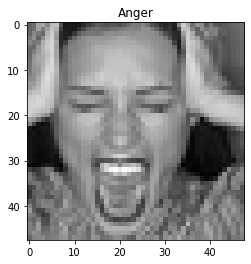

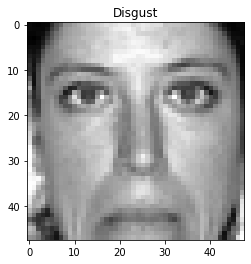

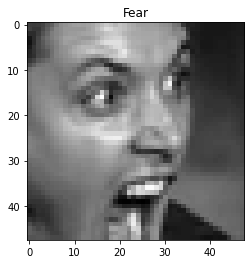

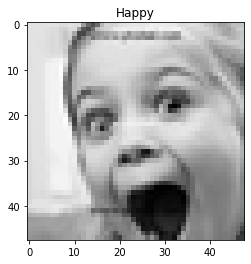

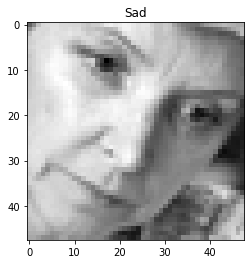

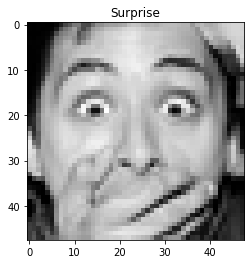

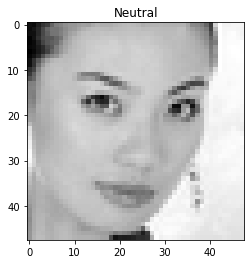

Quit? Enter Y:
y


In [7]:
from __future__ import print_function, division
from builtins import range, input
# Note: you may need to update your version of future
# sudo pip install -U future

import numpy as np
import matplotlib.pyplot as plt

from sklearn.utils import shuffle


label_map = ['Anger', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

def main():
    X, Y, _, _ = getData(balance_ones=False)

    while True:
        for i in range(7):
            x, y = X[Y==i], Y[Y==i]
            N = len(y)
            j = np.random.choice(N)
            plt.imshow(x[j].reshape(48, 48), cmap='gray')
            plt.title(label_map[y[j]])
            plt.show()
        prompt = input('Quit? Enter Y:\n')
        if prompt.lower().startswith('y'):
            break


if __name__ == '__main__':
    main()